Rectangular Method - Right Point Rule
======

# Theory
**Rectangular Method** is an approximation method of definite integrals, anther simplistic scheme of this method is **Right Point Rule** scheme
## Definition
Recall Riemann definition of the area under the curve of scalar valued function $f(x)$ over interval $[a,b]$.
$$
\begin{equation}
\int_a^b f(x) = \sum_{i=0}^\infty f(x_i^*) h
\end{equation}$$
where $x_i^*$ is a arbitrary point chosen in every $\text{i}^{\text{th}}$ sub-interval $[x_{i-1}, x_i]$ to evaluate the function at. Moreover $h$ is obtained from infinite discretization of the interval $[a,b]$
$$
\begin{align*}
a = x_0 \lt x_1 \lt &\dots \lt x_{N-1} \lt x_N = b \qquad \text{where} \quad N \rightarrow \infty\\[10pt]
\Longrightarrow \; &h = \frac{b-a}{N}
\end{align*}$$

Opposing to the **left point rule**, the **right point rule** choose the right point $x_i^* = x_i$ in every $\text{i}^{\text{th}}$ sub-interval $[x_{i-1}, x_i]$.
$$
\begin{equation}
\int_a^b f(x) \approx \sum_{i=1}^N f(x_i) h
\end{equation}$$
<img src="./Resources/Right Point Rule.png" width="700">


## Examples
Let $f(x) = x^2$ find the  rectangle method approximation of the definite integral between $[0, 3]$ and compare it with the analytical solution. Consider $N=3$. 

$$
\begin{align*}
\textbf{Right Point Rule :}& \qquad \int_0^3 f(x) \approx \sum_{i=1}^3 f(x_{i}) h = f(1) \cdot 1 + f(2) \cdot 1 + f(3) \cdot 1 = 14 \\[10pt]
                                
\textbf{Analytical :}& \qquad \int_0^3 x^2 = \frac{x^3}{3} \Big\rvert_{0}^{3} = \frac{(3)^3}{3} - 0 = 9
\end{align*}
$$


# Implementation

## Imports

In [25]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [26]:
a, b = [0,5]       # integration interval
N = 6              # number of subdivision
func = x**2 + 1    # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_args(Get arguments) --> discretize(Discretize the domain to N subdivisions)
        discretize --> compute(Compute the sum in equ.2 on the specified domain)
```

In [27]:
def right_rule(f: Callable, a: float, b: float, N: int) -> float:
    '''
    Rectangular method with right point rule for approximation of definite integral of function `f` between range `a`,`b`

    Args:
        f: Function to approximate definite integration between [a,b]
        a: Lower limit of integration interval
        b: Upper limit of integration interval
        N: Number of discretization points, where number of interval `subdivisions = N-1`

    Returns:
        Integration approximation of the function between the given range
    '''

    h = (b-a)/N
    x = np.linspace(a, b, num=N+1)    

    return np.sum(f(x[1:])*h)

### Placeholder

In [28]:
# analytical integration
func_int = sp.integrate(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_int = sp.lambdify(x, func_int)

# rectangular rule approximation
f_int_lRec = right_rule(f, a, b, N=N)

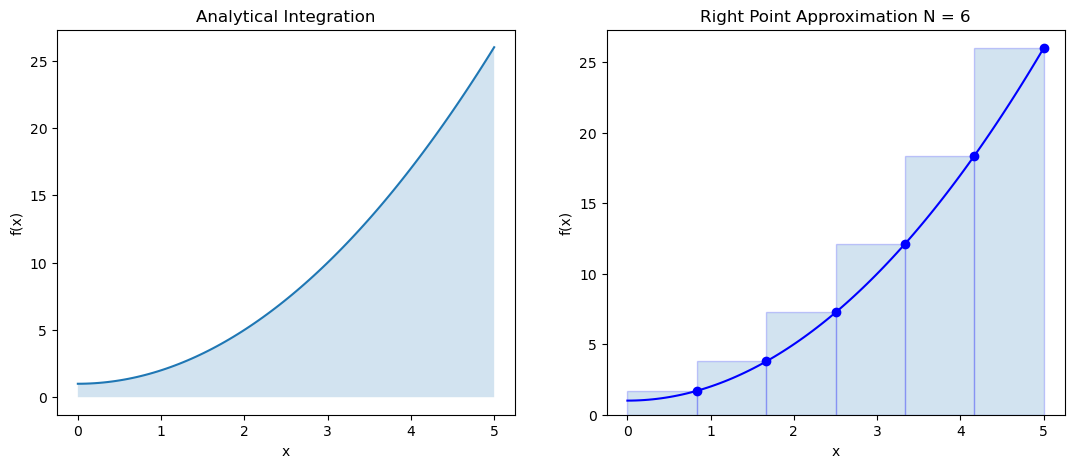

,Property,Quantity
0,analytical integration,46.666667
1,right point approximation,57.662037


In [29]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

# domains
xx = np.linspace(a, b, num=100)
x = np.linspace(a, b, num=N+1)

# f(x) plot
ax[0].plot(xx, f(xx))
ax[0].fill_between(xx, f(xx), alpha=0.2)
ax[0].set(xlabel="x", ylabel="f(x)", title="Analytical Integration")

# right point rule approximation
ax[1].plot(xx, f(xx), "b")
ax[1].plot(x[1:], f(x[1:]), "bo")
ax[1].bar(x[1:], f(x[1:]), width=-(b-a)/N, align='edge', alpha=0.2, edgecolor='b')
ax[1].set(xlabel="x", ylabel="f(x)", title=f"Right Point Approximation N = {N}")

# results table
summary = [
    ("analytical integration", f_int(b) - f_int(a)),
    ("right point approximation", f_int_lRec),
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df